In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

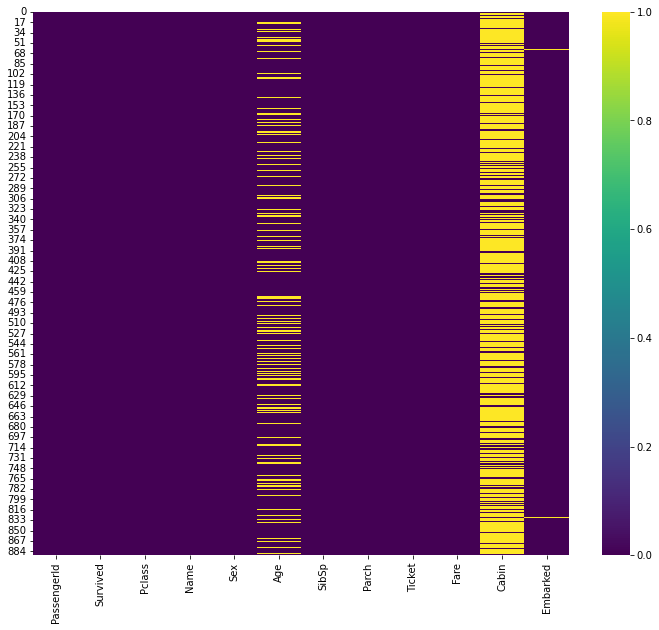

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),cmap='viridis')

In [7]:
df = df.drop('Cabin',axis=1)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:>

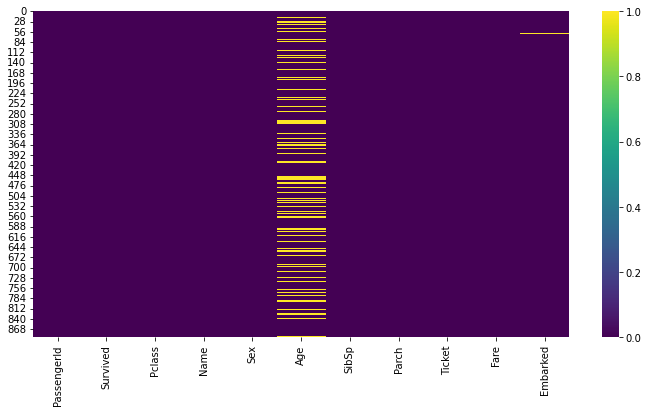

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='viridis')

/home/lalwani/mambaforge/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

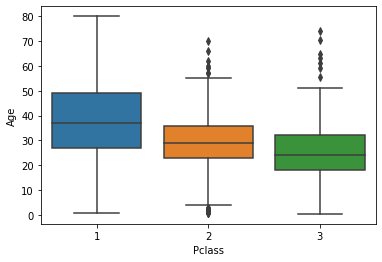

In [10]:
sns.boxplot(df['Pclass'],df['Age'].dropna())

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
sex_transformed = pd.get_dummies(df['Sex'], drop_first=True)

In [14]:
embark_transformed = pd.get_dummies(df['Embarked'],drop_first=True)

In [15]:
df_transformed = pd.concat([df,sex_transformed,embark_transformed],axis=1)
df_transformed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [16]:
df_transformed.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [17]:
X = df_transformed[['Pclass', 'Age', 'SibSp','Parch', 'Fare','male','Q','S']]

In [18]:
y = df_transformed['Survived']

<AxesSubplot:>

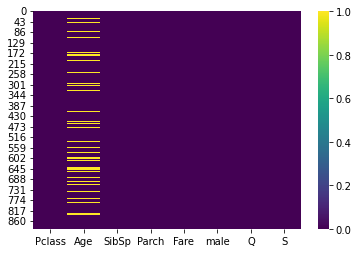

In [19]:
sns.heatmap(X.isnull(), cmap = 'viridis')

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
imputer = IterativeImputer(estimator=LinearRegression(),verbose=1)
X = imputer.fit_transform(X)

[IterativeImputer] Completing matrix with shape (891, 8)
[IterativeImputer] Change: 38.14194662784464, scaled tolerance: 0.5123292 
[IterativeImputer] Change: 0.0, scaled tolerance: 0.5123292 
[IterativeImputer] Early stopping criterion reached.


In [22]:
X_transform = pd.DataFrame(X,columns =['Pclass', 'Age', 'SibSp','Parch', 'Fare','male','Q','S'])


<AxesSubplot:>

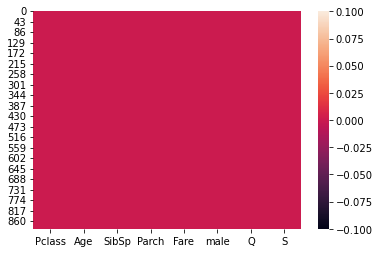

In [23]:
sns.heatmap(X_transform.isnull())

In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.01, random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [29]:
predictions = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.50      0.57         4

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9



In [32]:
confusion_matrix(y_test,predictions)

array([[4, 1],
       [2, 2]])

In [33]:
test = pd.read_csv('test.csv')

In [34]:
test_sex_transformed = pd.get_dummies(test['Sex'], drop_first=True)
test_embark_transformed = pd.get_dummies(test['Embarked'],drop_first=True)

In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
test_data = pd.concat([test,test_sex_transformed,test_embark_transformed],axis=1)

In [37]:
input_data = test_data[['Pclass', 'Age', 'SibSp','Parch', 'Fare','male','Q','S']]

<AxesSubplot:>

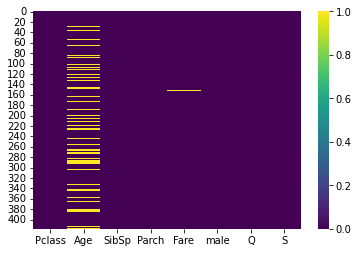

In [38]:
sns.heatmap(input_data.isnull(),cmap='viridis')

In [39]:
input_data_transformed = pd.DataFrame(imputer.transform(input_data),columns = ['Pclass', 'Age', 'SibSp','Parch', 'Fare','male','Q','S'])

[IterativeImputer] Completing matrix with shape (418, 8)


In [40]:
test_predictions = pd.Series(model.predict(input_data_transformed),name='Survived')

In [41]:
submission_df = pd.concat([test['PassengerId'],test_predictions],axis=1)

In [43]:
submission_df.to_csv('submission.csv',index=False)